# This project aims to use Facebook Prophet to predict the future price of HSI 
# IMPORTANT: it is 100% done by Hong Ka Ho

## We would use 10 years HSI historical data in this experiment and then we would extract the first 9 years data as training data in our model and then we would use the training model to predict the stock price of the remaining year. Finally, we would compare it with the real movement of stock price and make conclusions on that

In [38]:
#we first import the useful library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import datetime as dt
%matplotlib inline

In [2]:
#we then read the past hsi data
hsi_df = pd.read_csv('HSI.csv')

In [3]:
#Let's view the data of hsi_df
hsi_df=hsi_df.replace([np.inf, -np.inf], np.nan).dropna(how='all')
hsi_df = hsi_df.dropna()

In [4]:
#we just need date and adj close
#hsi_df = hsi_df[['Date', 'Adj Close']]
hsi_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,21860.039063,22024.830078,21689.220703,21823.279297,21823.279297,1.006200e+09
1,2010-01-05,22092.150391,22297.039063,21987.269531,22279.580078,22279.580078,1.965585e+09
2,2010-01-06,22357.460938,22514.789063,22277.130859,22416.669922,22416.669922,2.100234e+09
3,2010-01-07,22548.029297,22548.029297,22169.609375,22269.449219,22269.449219,1.495365e+09
4,2010-01-08,22282.750000,22443.220703,22206.160156,22296.750000,22296.750000,1.626023e+09


In [5]:
# Let's view the last 10 elements in the training dataset
hsi_df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2574,2020-06-08,25018.050781,25018.779297,24678.550781,24776.769531,24776.769531,2.123440e+09
2575,2020-06-09,24906.009766,25253.669922,24837.730469,25057.220703,25057.220703,2.203396e+09
2576,2020-06-10,25179.029297,25303.779297,24968.300781,25049.730469,25049.730469,1.971349e+09
2577,2020-06-11,24997.839844,25059.320313,24480.150391,24480.150391,24480.150391,1.838958e+09
2578,2020-06-12,23920.699219,24317.720703,23895.029297,24301.380859,24301.380859,1.824520e+09
2579,2020-06-15,23991.380859,24242.970703,23684.960938,23776.949219,23776.949219,2.104538e+09
2580,2020-06-16,24318.150391,24534.769531,24302.250000,24344.089844,24344.089844,1.611590e+09
2581,2020-06-17,24363.390625,24532.009766,24195.820313,24481.410156,24481.410156,1.278279e+09
2582,2020-06-18,24386.310547,24464.939453,24121.890625,24464.939453,24464.939453,1.811327e+09
2583,2020-06-19,24373.359375,24776.539063,24334.359375,24643.890625,24643.890625,2.390286e+09


In [6]:
#Let's look at some of the statistical summary of hsi
hsi_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2.573000e+03
mean,23841.619249,23964.863275,23687.755106,23829.045149,23829.045149,1.752625e+09
std,3176.430659,3186.054154,3159.061905,3173.090002,3173.090002,6.453358e+08
min,16731.580078,16840.910156,16170.349609,16250.269531,16250.269531,0.000000e+00
25%,21565.750000,21687.839844,21456.740234,21562.259766,21562.259766,1.352926e+09
50%,23245.580078,23348.330078,23122.750000,23221.519531,23221.519531,1.626023e+09
75%,26075.150391,26247.630859,25923.210938,26110.310547,26110.310547,1.971911e+09
max,33335.480469,33484.078125,32897.039063,33154.121094,33154.121094,9.527773e+09


In [7]:
#let's check if there are any null rows up to this point
hsi_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#let's arrange the data from oldest to newest
hsi_df = hsi_df.sort_values('Date')

In [9]:
hsi_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,21860.039063,22024.830078,21689.220703,21823.279297,21823.279297,1.006200e+09
1,2010-01-05,22092.150391,22297.039063,21987.269531,22279.580078,22279.580078,1.965585e+09
2,2010-01-06,22357.460938,22514.789063,22277.130859,22416.669922,22416.669922,2.100234e+09
3,2010-01-07,22548.029297,22548.029297,22169.609375,22269.449219,22269.449219,1.495365e+09
4,2010-01-08,22282.750000,22443.220703,22206.160156,22296.750000,22296.750000,1.626023e+09


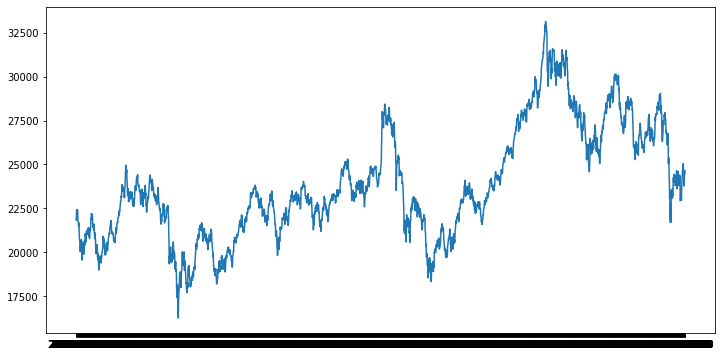

In [13]:
plt.figure(figsize = (12, 6))
ax = plt.plot(hsi_df['Date'], hsi_df['Close'])

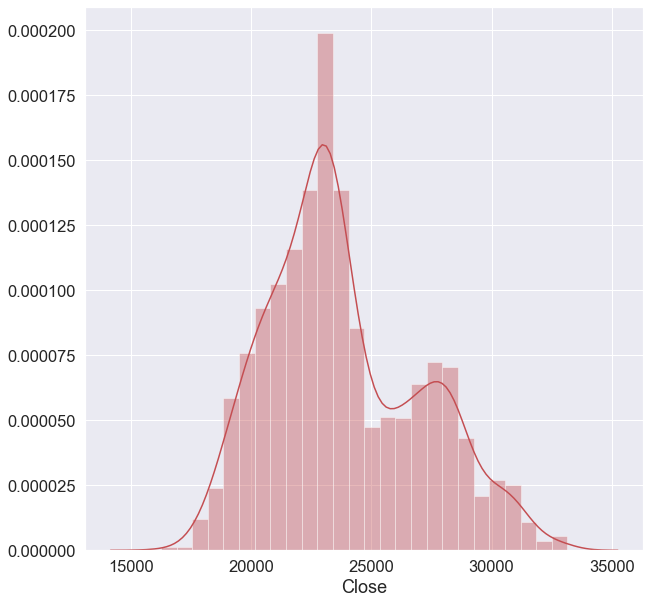

In [201]:
#Let's see the distribution of the close price of hsi
plt.figure(figsize = (12, 6))
sns.distplot(hsi_df['Close'], color = 'r')

In [202]:
hsi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2573 entries, 0 to 2583
Data columns (total 7 columns):
Date         2573 non-null object
Open         2573 non-null float64
High         2573 non-null float64
Low          2573 non-null float64
Close        2573 non-null float64
Adj Close    2573 non-null float64
Volume       2573 non-null float64
dtypes: float64(6), object(1)
memory usage: 160.8+ KB


In [36]:
from datetime import datetime

In [16]:
#I would like to first indicate the year of each data from the date itself
my_date_list = []
for time in range(len(hsi_df['Date'])):
    my_date = datetime.strptime(hsi_df['Date'].iloc[time], "%Y-%m-%d")
    my_date_list.append(my_date.year)
hsi_df['Year'] = my_date_list
#let's look at the last few items in the df
hsi_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
2579,2020-06-15,23991.380859,24242.970703,23684.960938,23776.949219,23776.949219,2.104538e+09,2020
2580,2020-06-16,24318.150391,24534.769531,24302.250000,24344.089844,24344.089844,1.611590e+09,2020
2581,2020-06-17,24363.390625,24532.009766,24195.820313,24481.410156,24481.410156,1.278279e+09,2020
2582,2020-06-18,24386.310547,24464.939453,24121.890625,24464.939453,24464.939453,1.811327e+09,2020
2583,2020-06-19,24373.359375,24776.539063,24334.359375,24643.890625,24643.890625,2.390286e+09,2020


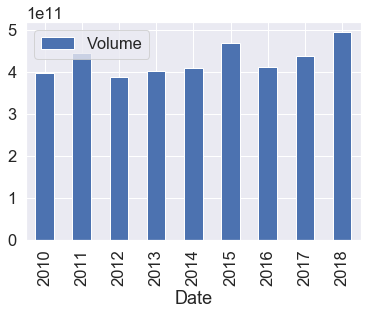

In [205]:
#then I want to see if there is any change in trend of volume by year
Volume = []
for year in range(2010,2019,1):
    data = hsi_df[hsi_df['Year'] == year]
    volume_amt = data['Volume'].sum()
    Volume.append(volume_amt)
Volume
Volume_Data = pd.DataFrame({'Volume': Volume,
                            'Date': list(range(2010,2019))
                           })
Volume_Data.plot.bar(x = 'Date', y = 'Volume')

- We would see that there is a zigzag path in volume movement of stock trading, until now 2018 is having the highest volume traded, following by 2015 and 2011

## Now, we would try to train the Facebook Porphet with our data

In [98]:
hsi_df = pd.read_csv('HSI.csv')

In [99]:
#we would just use the data without the last 365 days as the training data
hsi_df = hsi_df[['Date', 'Close']]

In [100]:
hsi_df.tail()

,Date,Close
2579,2020-06-15,23776.949219
2580,2020-06-16,24344.089844
2581,2020-06-17,24481.410156
2582,2020-06-18,24464.939453
2583,2020-06-19,24643.890625


In [101]:
hsi_adjusted_df = hsi_df.rename(columns = {'Date':'ds', 'Close':'y'})
hsi_adjusted_df.iloc[:-365].head()

,ds,y
0,2010-01-04,21823.279297
1,2010-01-05,22279.580078
2,2010-01-06,22416.669922
3,2010-01-07,22269.449219
4,2010-01-08,22296.750000


In [102]:
#Set up the training model
m = Prophet()
m.fit(hsi_df_no_weekdays.iloc[:-365])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
#Predict the future 365 days closed stock price
future = m.make_future_dataframe(periods = 365)
# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=5]
forecast = m.predict(future)

In [104]:
#look at the prediction df
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,20020.732389,18146.601521,21605.099148,20020.732389,20020.732389,-83.847136,-83.847136,-83.847136,-338.320205,-338.320205,-338.320205,254.473069,254.473069,254.473069,0.0,0.0,0.0,19936.885254
1,2010-01-05,20030.954716,18294.850478,21829.060878,20030.954716,20030.954716,-18.727568,-18.727568,-18.727568,-333.928757,-333.928757,-333.928757,315.201190,315.201190,315.201190,0.0,0.0,0.0,20012.227148
2,2010-01-06,20041.177043,18363.821114,21755.692995,20041.177043,20041.177043,62.595460,62.595460,62.595460,-311.200260,-311.200260,-311.200260,373.795720,373.795720,373.795720,0.0,0.0,0.0,20103.772502
3,2010-01-07,20051.399369,18418.290683,21842.993291,20051.399369,20051.399369,112.664628,112.664628,112.664628,-316.974914,-316.974914,-316.974914,429.639542,429.639542,429.639542,0.0,0.0,0.0,20164.063997
4,2010-01-08,20061.621696,18517.912298,22024.088437,20061.621696,20061.621696,136.583993,136.583993,136.583993,-345.574163,-345.574163,-345.574163,482.158156,482.158156,482.158156,0.0,0.0,0.0,20198.205688
5,2010-01-11,20092.288675,18727.362643,22079.720003,20092.288675,20092.288675,276.512911,276.512911,276.512911,-338.320205,-338.320205,-338.320205,614.833116,614.833116,614.833116,0.0,0.0,0.0,20368.801587
6,2010-01-12,20102.511002,18605.441723,22001.213146,20102.511002,20102.511002,315.512806,315.512806,315.512806,-333.928757,-333.928757,-333.928757,649.441564,649.441564,649.441564,0.0,0.0,0.0,20418.023808
7,2010-01-13,20112.733328,18789.886707,22238.225031,20112.733328,20112.733328,367.558706,367.558706,367.558706,-311.200260,-311.200260,-311.200260,678.758966,678.758966,678.758966,0.0,0.0,0.0,20480.292034
8,2010-01-14,20122.955655,18739.953201,22253.009263,20122.955655,20122.955655,385.635381,385.635381,385.635381,-316.974914,-316.974914,-316.974914,702.610295,702.610295,702.610295,0.0,0.0,0.0,20508.591036
9,2010-01-15,20133.177981,18747.649744,22233.800458,20133.177981,20133.177981,375.325188,375.325188,375.325188,-345.574163,-345.574163,-345.574163,720.899351,720.899351,720.899351,0.0,0.0,0.0,20508.503169


<Figure size 864x432 with 0 Axes>

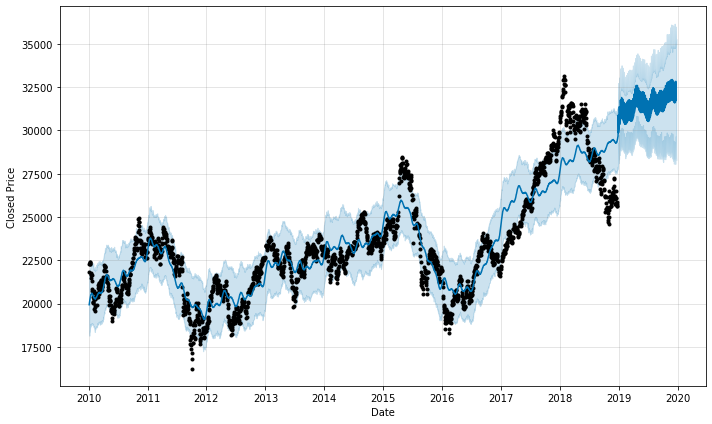

In [68]:
plt.figure(figsize = (12, 6))
figure = m.plot(forecast, xlabel='Date', ylabel='Closed Price')

## We see that from the prediction, we would predict that the stock price is going to increase in the future 365 days in HSI

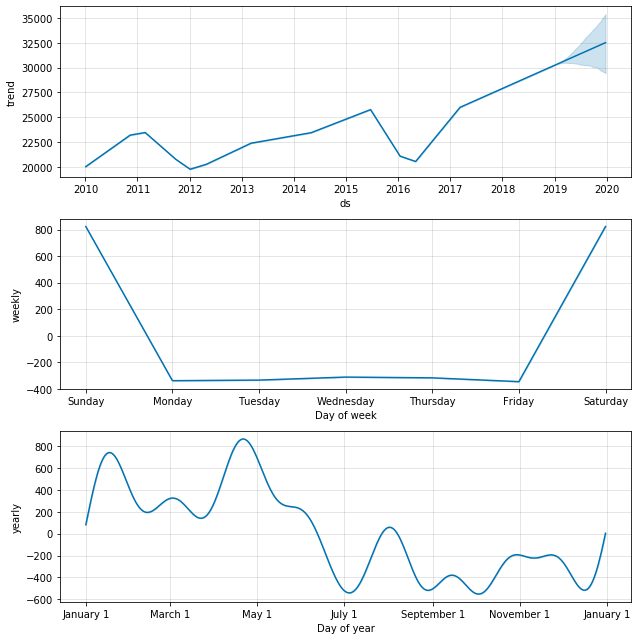

In [69]:
figure2 = m.plot_components(forecast,)

## We see that the predicted trend in upward moving
## From the weekly prediction, we would see that there would be a predicted decrase on Weekdays(Monday to Friday) and then followed by a great increase in weekend(Saturday and Sunday)
## From the yearly prediction, we can see the predicted movement of HSI in a year is moving in a volatile extent with peaks at January, May, August, November while troughs will be shown at February, April, July, September, October and even December

# We can now compare the predicted data with the real data

In [78]:
#extract the date and trend of the whole forecast
prediction = forecast[['ds', 'trend']]
prediction.head()

,ds,trend
0,2010-01-04,20020.732389
1,2010-01-05,20030.954716
2,2010-01-06,20041.177043
3,2010-01-07,20051.399369
4,2010-01-08,20061.621696


- In conclusion, using Facebook Prophet we would predict that HSI would fall while in reality we would find the HSI is generally falls, so in this case, facebook prophet is not so good in predicting the stock price

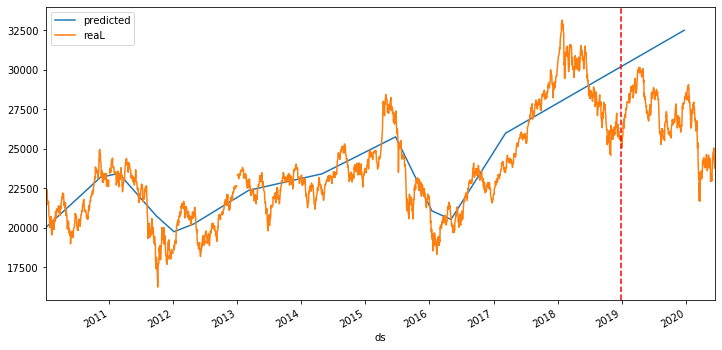

In [90]:
#let's compare the predicted trend and the actual trend of HSI
ax = prediction.plot(x = 'ds', y = 'trend', label = 'predicted', figsize = (12, 6))
hsi_adjusted_df.plot(ax = ax, x = 'ds', y = 'y', label = 'reaL')
ax.axvline(x = hsi_adjusted_df.iloc[-365]['ds'], ls = '--', color = 'r')

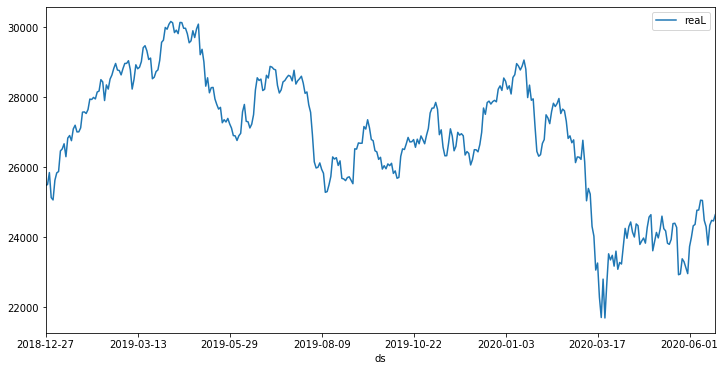

In [106]:
#take a closer look at the actual trend
hsi_adjusted_df.iloc[-365:].plot(x = 'ds', y = 'y', label = 'reaL', figsize = (12, 6))

## From 2018-12-27 to 2020-01-03, the trend looks pretty good in the sense that it is generally upward moving trend. However, from 2020-01 - 2020-06 , there is a great violation in the predicted trend because there are outbreak of the coronavirus in Jan 2020. This makes our trend deviates from the actual from

# Limitations:

## There are only one parameter for prediction which is the price in this case, so it may not capture the future trend successfully due to limited explanatory power of the price

## Another reason is that the study of price using machine learning would just reflect the price trend and there maybe other accidents like what's happening in 2020 with the outbreak of the pandemic and the model fails to capture other factors such as political instability of a city and health crisis which may affect the stock price other than the price itself.